# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment you will be able to :

- perform video classification with Keras and Deep Learning


In [1]:
#@title Experiment Walkthrough Video
from IPython.display import HTML

HTML("""<video width="420" height="540" controls>
  <source src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Walkthrough/Sports_Video_Classification.mp4" type="video/mp4">
</video>
""")

## Dataset

### Description


This is a hand-made dataset which contains images of various sports activities.

The dataset comprises of 3 sports activities:

    boxing
    swimming
    table tennis

There are around 2,100 images, in which each category comprises of around 700 pictures.

Additionally to test the model, **two sample videos** were provided to perform classification

### Transfer Learning

Transfer learning is a machine learning technique in which a network that has been trained to perform a specific task is being reused (repurposed) as a starting point for another similar task.

### Setup Steps

In [3]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id="2100121"#@param{type:"string"}

In [6]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password="5142192291"#@param{type:"string"}

In [5]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "U4W23_59_Sports_Video_Classification_B" #name of the notebook
def setup():
    ipython.magic("sx wget https://cdn.iiith.talentsprint.com/aiml/mvsr/videodataset.zip")
    ipython.magic("sx unzip videodataset.zip")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print ("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### 1. Importing required packages

In [7]:
import cv2
import math
import statistics
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout
from keras.preprocessing.image import ImageDataGenerator

### 2.  Data Preprocessing

In [9]:
# Specify root data directory
train_data_dir = "data"

img_height = 224 # YOUR CODE HERE: To define the value for image height
img_width = 224 # YOUR CODE HERE: To define the value for image width
batch_size = 10

image_datagen = ImageDataGenerator(validation_split=0.2) # set validation split

#### Loading the data

In [10]:
train_generator = image_datagen.flow_from_directory(train_data_dir,
                                                    target_size = (img_height, img_width),
                                                    batch_size = batch_size,
                                                    subset='training') # set as training data

print("Class names and respective labels: ",train_generator.class_indices)
print("Image Shape: ", train_generator.image_shape)

Found 1674 images belonging to 3 classes.
Class names and respective labels:  {'boxing': 0, 'swimming': 1, 'table_tennis': 2}
Image Shape:  (224, 224, 3)


In [11]:
validation_generator = image_datagen.flow_from_directory(train_data_dir, # same directory as training data
                                                         target_size = (img_height, img_width),
                                                         batch_size = batch_size,
                                                         subset='validation') # set as validation data

Found 416 images belonging to 3 classes.


#### labels Translator

In [12]:
labels = {i:v for v, i in validation_generator.class_indices.items()}
print("Dictionary of Labels: ",labels)

Dictionary of Labels:  {0: 'boxing', 1: 'swimming', 2: 'table_tennis'}


### 3. Loading VGG16 model with pretrained weights

In [13]:
vgg_base =  VGG16(weights='imagenet',    # use weights for ImageNet
                 include_top=False,     # drop the Dense layers!
                 input_shape=(img_height, img_width, 3))
# YOUR CODE HERE: To define the VGG model with pretrained weights

vgg_base.trainable = False # Freezing the weights

58892288/58889256 [==============================] - 0s 0us/step


### 4. Fine-tuning VGG16

* Copy the first trained layers (base model) and then add a new custom layers in the sequential layer to perform classification on a specific task

In [14]:
model = Sequential([
        # our vgg16_base model added as a layer
        vgg_base,
        
        # here is our custom prediction layer 
        Flatten(),
        Dropout(0.50),
        Dense(1048, activation='relu'),
        Dropout(0.10),         
        Dense(units=3, activation='softmax')
    ])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1048)              26293272  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3147      
Total params: 41,011,107
Trainable params: 26,296,419
Non-trainable params: 14,714,688
___________________________________

### 5. Train the deep learning model

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

nb_epochs = 5

monitor = EarlyStopping(monitor='val_accuracy') # YOUR CODE HERE: To define the earlystopping method which takes the parameter as quantity to be monitored is validation accuracy

# YOUR CODE HERE: To compile the model
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

# YOUR CODE HERE: To train the model
model.fit(train_generator, validation_data = validation_generator, callbacks=[monitor], epochs = nb_epochs)


Epoch 1/5
168/168 [==============================] - 21s 79ms/step - loss: 23.6143 - accuracy: 0.8051 - val_loss: 0.8890 - val_accuracy: 0.9591
Epoch 2/5
168/168 [==============================] - 12s 72ms/step - loss: 0.8809 - accuracy: 0.9697 - val_loss: 0.3331 - val_accuracy: 0.9784
Epoch 3/5
168/168 [==============================] - 13s 75ms/step - loss: 0.7109 - accuracy: 0.9698 - val_loss: 0.4009 - val_accuracy: 0.9784


### 6. Evaluate the trained deep learning model

<br>

**List of VideoCapture Methods utilized**

    "cap.get()" - Access some of the features of this video using cap.get(propId) method, where propId is a number from 0 to 18.
    Each number denotes a property of the video and full details can be seen here
    For example, I can check the frame width and height by cap.get(3) and cap.get(4) and the frame-rate using cap.get(5)    

    "cap.isOpened()" - Check whether cap is initialized or not by the method cap.isOpened(), proceed If it is True

    "cap.read()" - Capture a frame-by-frame
    returns a bool (True/False). If frame is read correctly, it will be True.

    "cap.release()" - Release everything if job is finished
    In order to create another instance cap2 = cv2.VideoCapture(0) release the existing resource

In [17]:
def classify(videoPath):
    cap = cv2.VideoCapture(videoPath)   # capturing the video from the given path
    frameRate = cap.get(5) #frame rate
    frameResults = []

    while (cap.isOpened()):
        frameId = cap.get(1) #current frame number

        ret, frame = cap.read()
        if (ret != True):
            break

        if (frameId % math.floor(frameRate) == 0):
            # YOUR CODE HERE: To convert an image from one color space to another
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame = cv2.resize(frame, (224, 224))
            plt.imshow(frame)
            preds = model.predict(np.expand_dims(frame, axis=0))[0]
            frameResults.append(labels[np.argmax(preds)])

    cap.release()
    return "Activity: ", statistics.mode(frameResults)

('Activity: ', 'boxing')

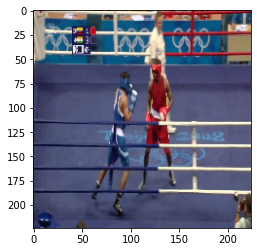

In [18]:
# Pass the testing video path as input to the classify method
classify("sample_clips/test1.mp4")

('Activity: ', 'swimming')

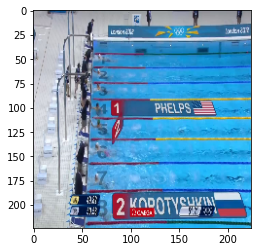

In [19]:
classify("sample_clips/test2.mp4")

### Please answer the questions below to complete the experiment:

In [27]:
#@title State True or False: In this experiment, the early stopping halts the training of the neural networks when the validation accuracy decreases { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "TRUE" #@param ["","TRUE","FALSE"]


In [21]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [29]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "mn" #@param {type:"string"}


In [31]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [23]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [24]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [25]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [32]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 15258
Date of submission:  13 Feb 2021
Time of submission:  15:44:55
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
